In [28]:
from pathlib import Path

import numpy as np
import pandas as pd

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [16]:
%matplotlib inline

import seaborn as sns
import plotly.graph_objects as go
from matplotlib import pyplot as plt

In [4]:
path_data_input = Path('../data/input')

In [5]:
def load_data(path_data):
    data_dct = {}

    for i, path_file in enumerate((path_data).glob('*.csv'), 1):
        print(i, path_file)
        file_name = path_file.name.replace('.csv', '')

        df = pd.read_csv(path_file, header=None, skiprows=3)
        data_dct[file_name] = {}
        data_dct[file_name] = df
    return data_dct

In [6]:
# gestures = load_data(path_data_input/'gestures')
# gestures = pd.concat(gestures)

# print(gestures.shape)
# gestures.head()

In [7]:
fingers = load_data(path_data_input/'fingers')
fingers = pd.concat(fingers)
fingers.columns = [f'x_{i}' for i in range(1, len(fingers.columns))] + ['y']

print(fingers.shape)
fingers.head()

1 ../data/input/fingers/Gesture_11_finger.csv
2 ../data/input/fingers/Gesture_12_finger.csv
3 ../data/input/fingers/Gesture_13_finger.csv
4 ../data/input/fingers/Gesture_14_finger.csv
5 ../data/input/fingers/Gesture_15_finger.csv
(24818, 9)


x_1  x_2  x_3  x_4  x_5  x_6  x_7  x_8  y
Gesture_11_finger 0  501  570  428  196  367  278  214  189  0
                  1  500  569  429  196  368  279  215  189  0
                  2  500  568  426  196  368  278  214  189  0
                  3  499  568  428  195  367  278  213  188  0
                  4  500  570  427  194  366  277  213  188  0

In [8]:
# приведем классы к значениям {0, 1, ..., 5}
fingers['y'] = fingers['y'] % 10

In [9]:
fingers['y'].value_counts()

0    12596
5     2520
2     2520
4     2394
3     2394
1     2394
Name: y, dtype: int64

In [32]:
X = fingers.drop(columns=['y'])
y = fingers['y']

## 2D

In [33]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [34]:
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')

Explained variation per principal component: [0.94693214 0.03780161]


<AxesSubplot:>

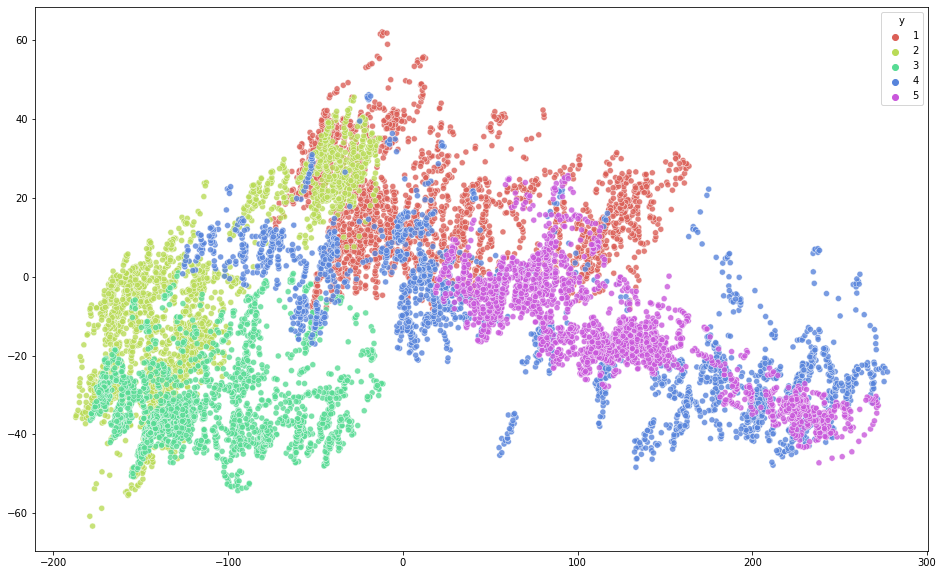

In [48]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=X_pca[y != 0, 0],
    y=X_pca[y != 0, 1],
    hue=y[y != 0],
    palette=sns.color_palette('hls', y.nunique() - 1),
    legend='full',
    alpha=0.8
)

In [43]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

<AxesSubplot:>

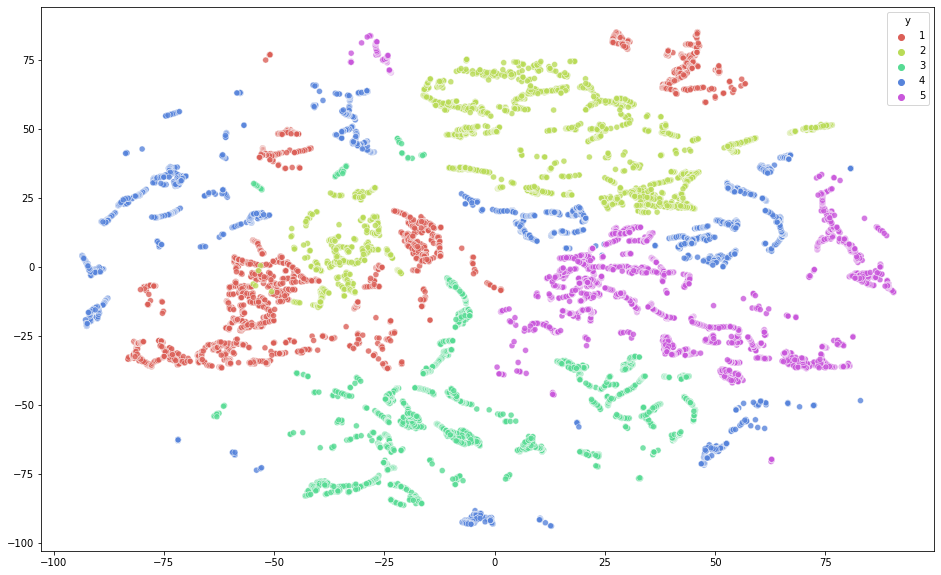

In [50]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=X_tsne[y != 0, 0],
    y=X_tsne[y != 0, 1],
    hue=y[y != 0],
    palette=sns.color_palette('hls', y.nunique() - 1),
    legend='full',
    alpha=0.8
)

## 3D

In [51]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [52]:
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')

Explained variation per principal component: [0.94693214 0.03780161 0.01059096]


In [80]:
layout = go.Layout(
    width=1000,
    height=1000,
    autosize=False,
    showlegend=True
)

data = []
for i in y.unique():
    trace = go.Scatter3d(
            x=X_pca[y == i, 0],
            y=X_pca[y == i, 1],
            z=X_pca[y == i, 2],
            name=f'{i}',
            mode='markers',
            marker=dict(
                size=2,
                color=i,
                # opacity=0.95
            )
        )
    data.append(trace)
    
fig = go.Figure(data=data, layout=layout)

fig.show()

In [81]:
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

In [82]:
layout = go.Layout(
    width=1000,
    height=1000,
    autosize=False,
    showlegend=True
)

data = []
for i in y.unique():
    trace = go.Scatter3d(
            x=X_tsne[y == i, 0],
            y=X_tsne[y == i, 1],
            z=X_tsne[y == i, 2],
            name=f'{i}',
            mode='markers',
            marker=dict(
                size=2,
                color=i,
                # opacity=0.95
            )
        )
    data.append(trace)
    
fig = go.Figure(data=data, layout=layout)

fig.show()